In [60]:
import pandas as pd

,step,num_vehicles,avg_intervehicular_distance,northbound_flow,southbound_flow,northbound_speed,southbound_speed,average_speed
0,1,1,0.0,1,0,22.351000,0,22.352000
1,2,1,0.0,1,0,22.081392,0,21.812784
2,3,1,0.0,1,0,22.283030,0,22.216061
3,4,1,0.0,1,0,22.344817,0,22.339635
4,5,1,0.0,1,0,22.302199,0,22.254397


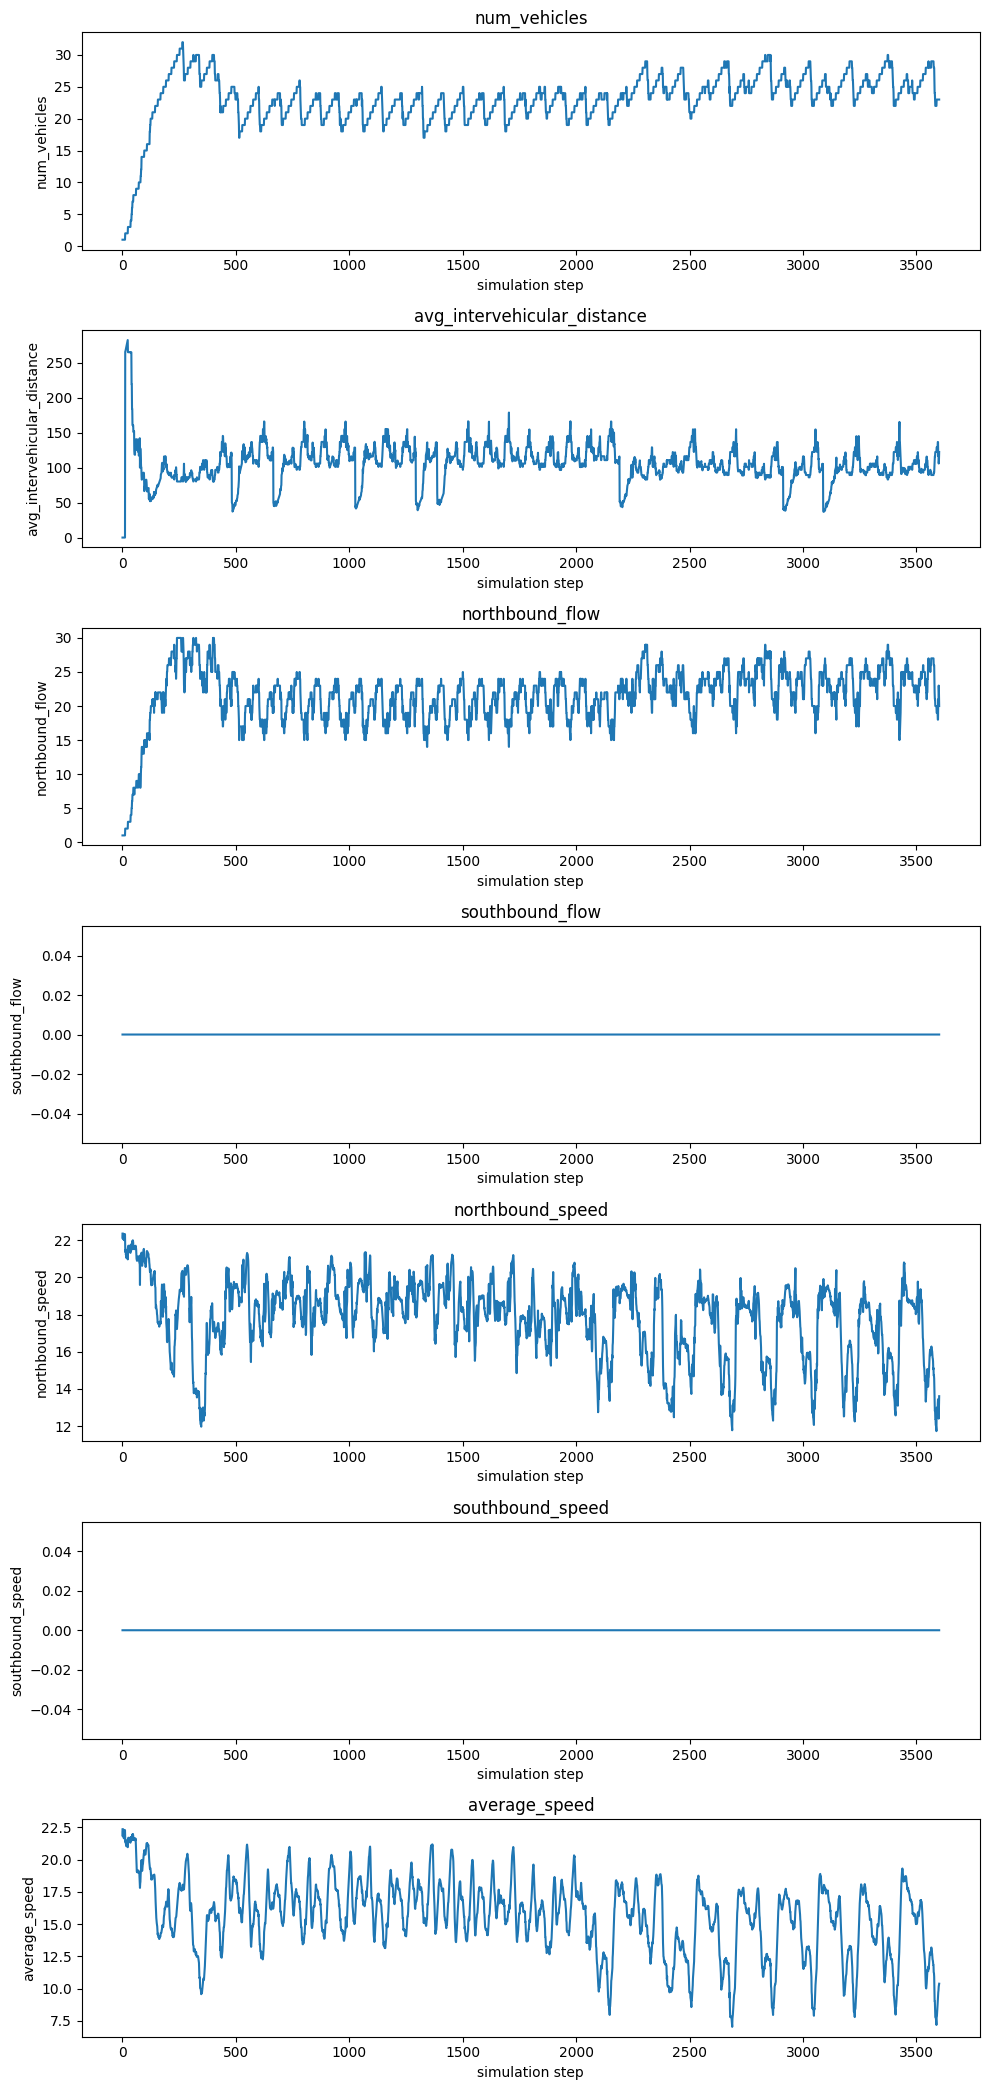

Averages over entire run:


,mean
num_vehicles,23.133056
avg_intervehicular_distance,105.889497
northbound_flow,21.611944
southbound_flow,0.000000
northbound_speed,17.813169
southbound_speed,0.000000
average_speed,15.618443


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# read data
df = pd.read_csv("test.csv")

# quick look
display(df.head())

# line‑plots for each numeric column except the step index
metrics = [c for c in df.columns if c != "step"]
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 3 * len(metrics)))

for ax, col in zip(axes, metrics):
    ax.plot(df["step"], df[col])
    ax.set_title(col)
    ax.set_xlabel("simulation step")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

# print simple averages
print("Averages over entire run:")
display(df[metrics].mean().to_frame("mean"))


,step,num_vehicles,avg_intervehicular_distance,northbound_flow,southbound_flow,northbound_speed,southbound_speed,average_speed
0,5,1,0.000000,1,0,22.302199,0.0,22.254397
1,10,1,0.000000,1,0,22.192454,0.0,22.034908
2,15,2,268.200829,2,0,21.488576,0.0,21.488576
3,20,2,276.178737,2,0,21.471380,0.0,21.471380
4,25,3,265.055914,3,0,21.605488,0.0,21.605488


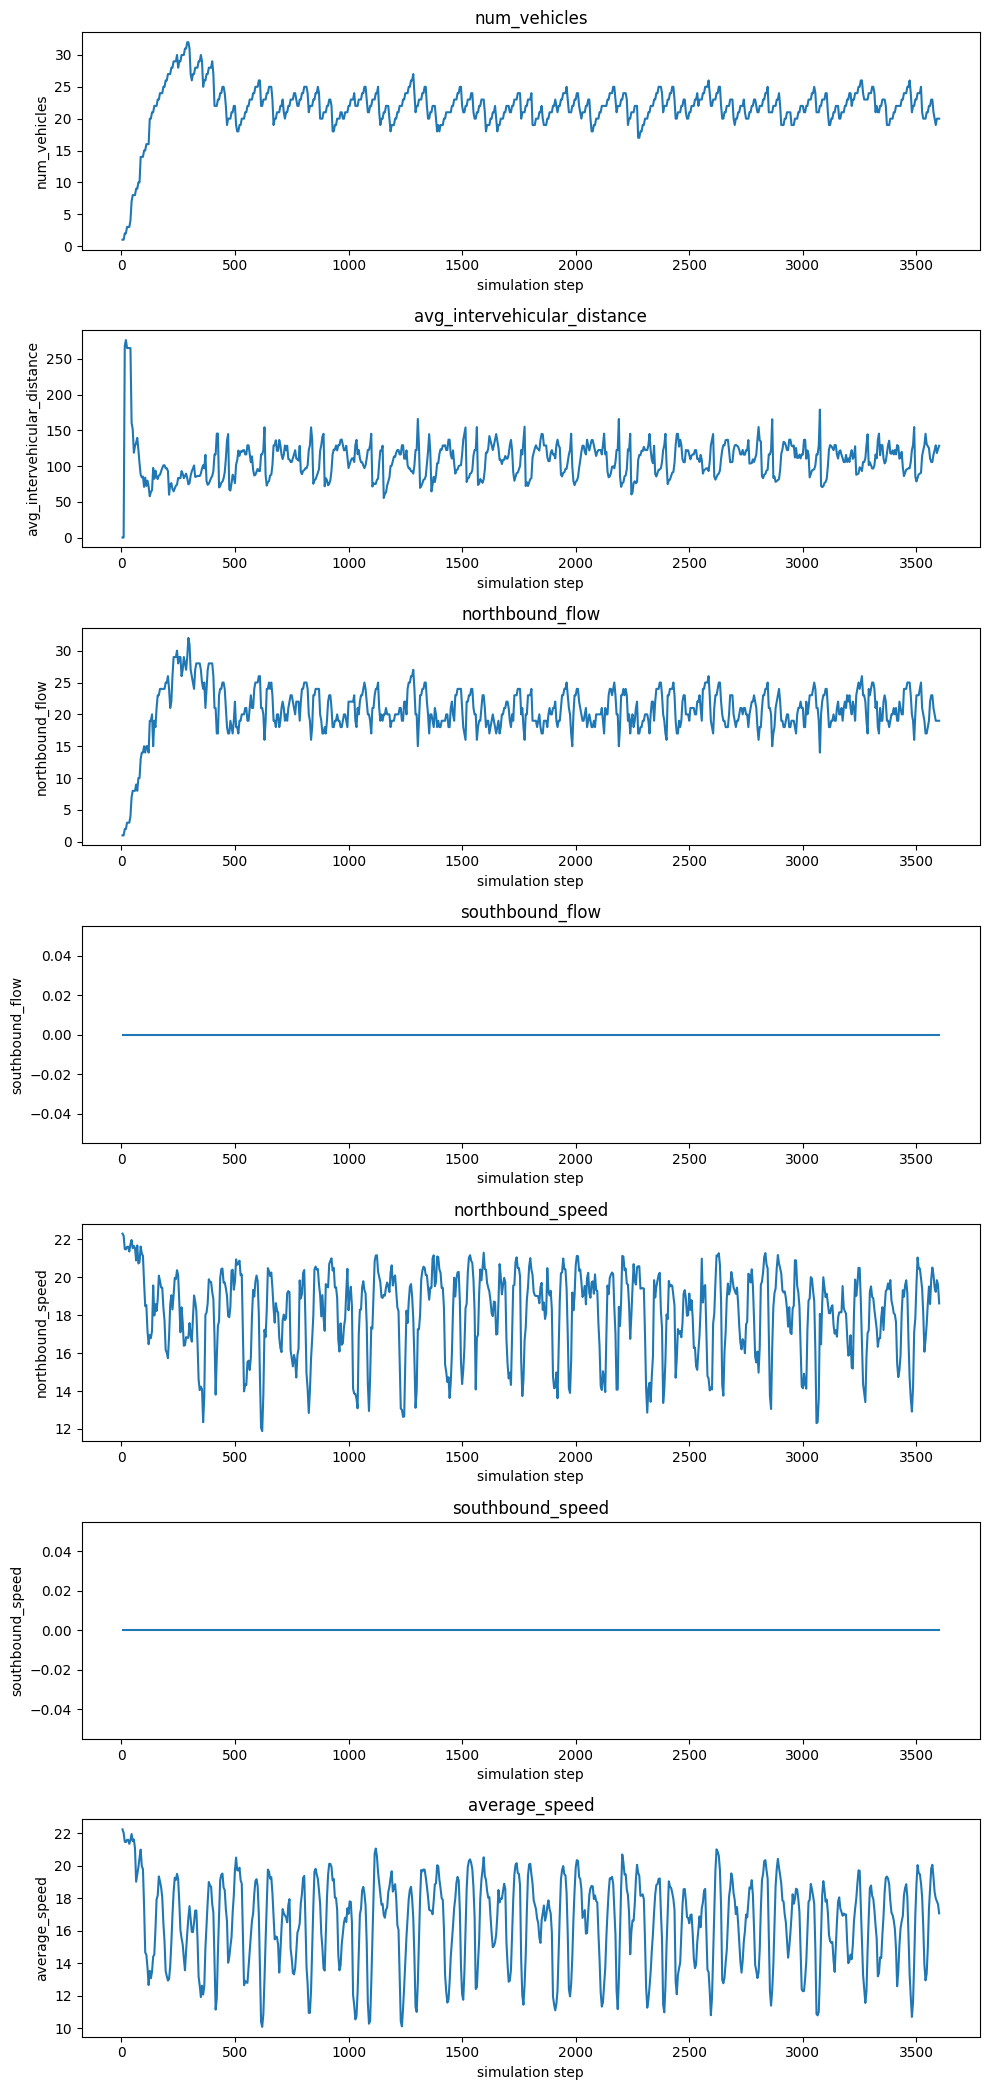

Averages over entire run:


,mean
num_vehicles,21.893056
avg_intervehicular_distance,108.792298
northbound_flow,20.727778
southbound_flow,0.000000
northbound_speed,18.154788
southbound_speed,0.000000
average_speed,16.562066


In [62]:
# test_simulation_metrics_no_signal_coordination.csv
import pandas as pd
import matplotlib.pyplot as plt

# read data
df = pd.read_csv("test_simulation_metrics_no_signal_coordination.csv")

# quick look
display(df.head())

# line‑plots for each numeric column except the step index
metrics = [c for c in df.columns if c != "step"]
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 3 * len(metrics)))

for ax, col in zip(axes, metrics):
    ax.plot(df["step"], df[col])
    ax.set_title(col)
    ax.set_xlabel("simulation step")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

# print simple averages
print("Averages over entire run:")
display(df[metrics].mean().to_frame("mean"))


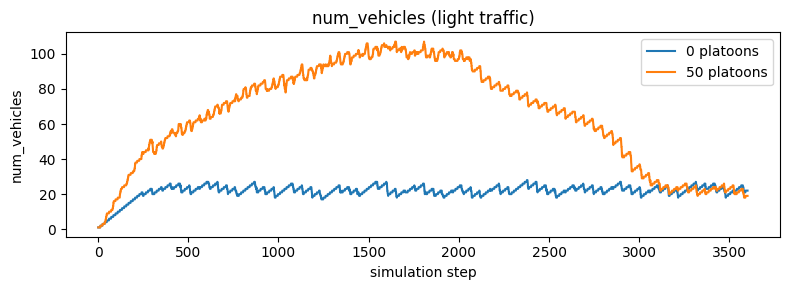

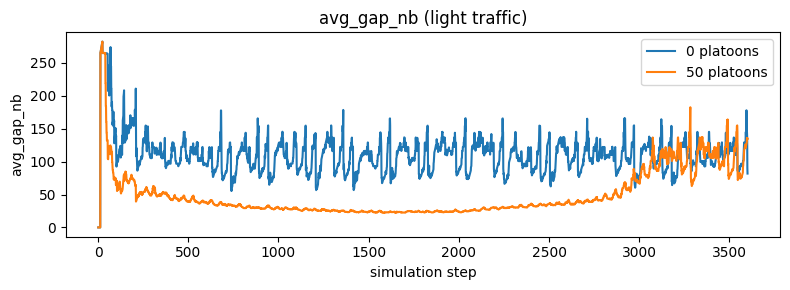

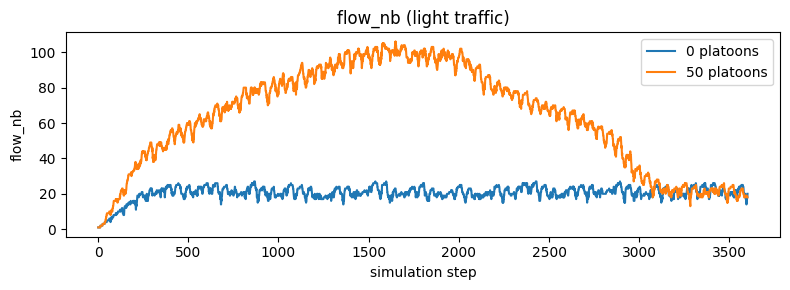

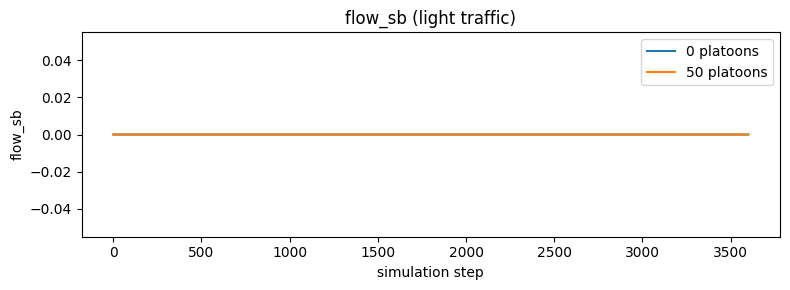

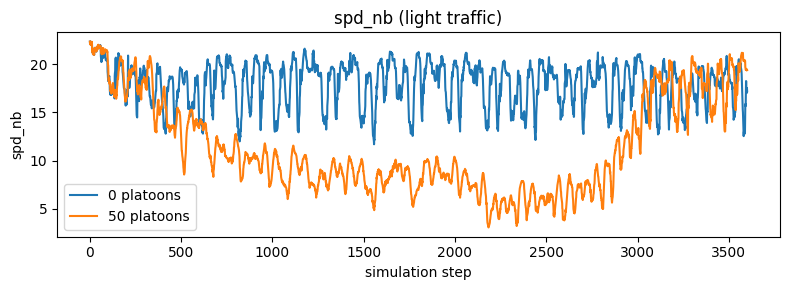

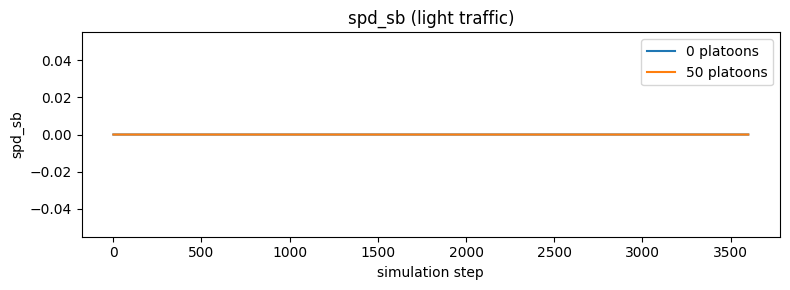

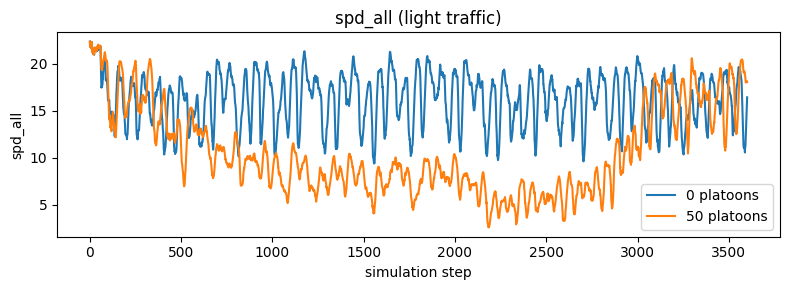

,num_vehicles,avg_gap_nb,flow_nb,flow_sb,spd_nb,spd_sb,spd_all
0 platoons,21.652500,110.415458,20.453333,0.0,17.977901,0.0,16.226006
50 platoons,65.193611,49.319553,63.339167,0.0,11.362918,0.0,10.568993


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

df_base = pd.read_csv("ps0_np0_traffic_light_nocoordination.csv")     # no platoons
df_platoons = pd.read_csv("ps4_np50_traffic_light_nocoordination.csv")    # 50 platoons

metrics = [c for c in df_base.columns if c != "step"]

for m in metrics:
    plt.figure(figsize=(8, 3))
    plt.plot(df_base["step"], df_base[m], label="0 platoons")
    plt.plot(df_platoons["step"], df_platoons[m], label="50 platoons")
    plt.title(f"{m} (light traffic)")
    plt.xlabel("simulation step")
    plt.ylabel(m)
    plt.legend()
    plt.tight_layout()
    plt.show()

avg_base     = df_base[metrics].mean()
avg_platoon  = df_platoons[metrics].mean()

summary = pd.DataFrame({
    "0 platoons":  avg_base,
    "50 platoons": avg_platoon
}).T

display(summary)


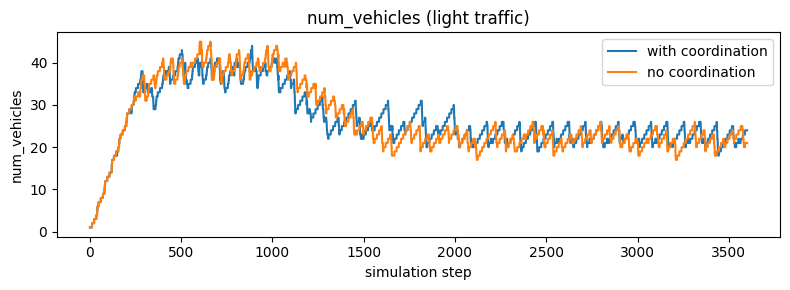

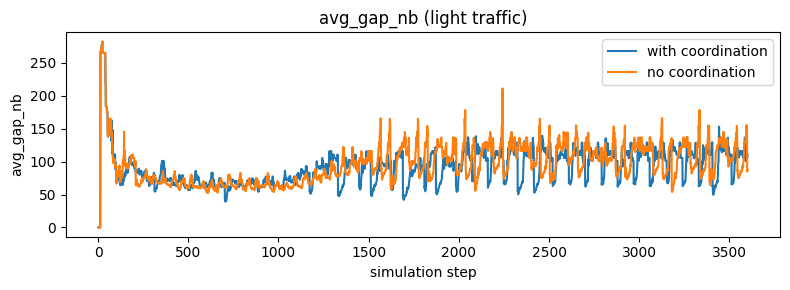

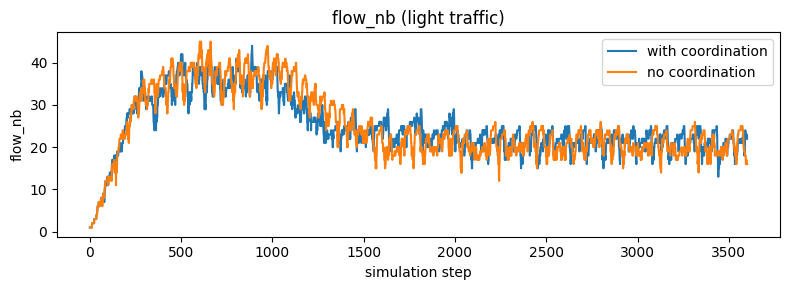

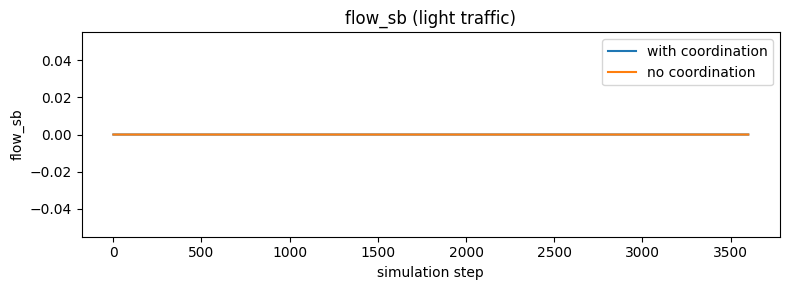

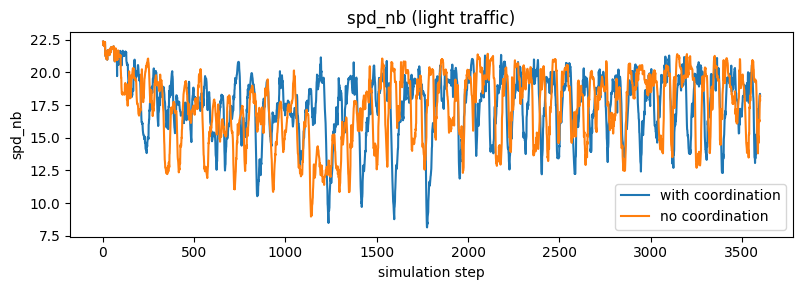

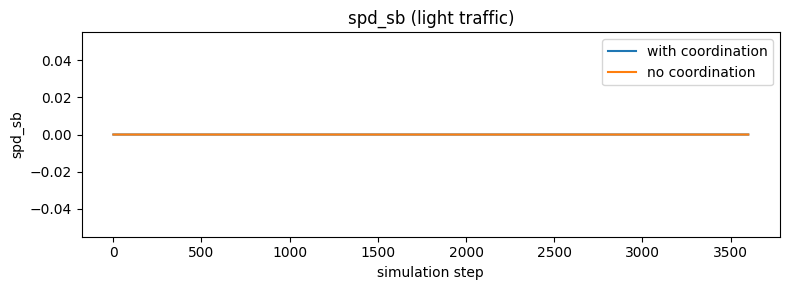

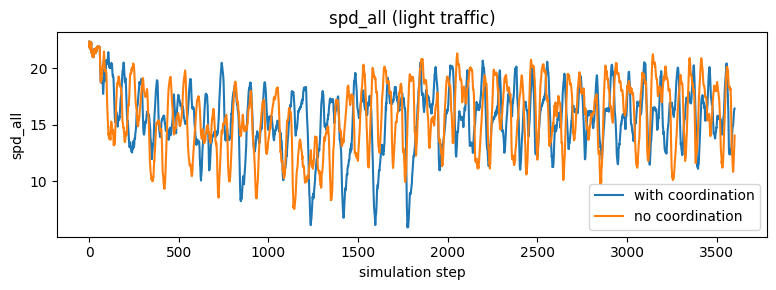

,num_vehicles,avg_gap_nb,flow_nb,flow_sb,spd_nb,spd_sb,spd_all
0 platoons,26.568333,91.388640,24.948889,0.0,17.599457,0.0,15.676973
50 platoons,26.442500,95.523438,25.077500,0.0,17.393108,0.0,15.849043


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

df_base = pd.read_csv("ps2_np25_traffic_light_coordination.csv")     # no platoons
df_platoons = pd.read_csv("ps2_np25_traffic_light_nocoordination.csv")    # 50 platoons

metrics = [c for c in df_base.columns if c != "step"]

for m in metrics:
    plt.figure(figsize=(8, 3))
    plt.plot(df_base["step"], df_base[m], label="with coordination")
    plt.plot(df_platoons["step"], df_platoons[m], label="no coordination")
    plt.title(f"{m} (light traffic)")
    plt.xlabel("simulation step")
    plt.ylabel(m)
    plt.legend()
    plt.tight_layout()
    plt.show()

avg_base     = df_base[metrics].mean()
avg_platoon  = df_platoons[metrics].mean()

summary = pd.DataFrame({
    "0 platoons":  avg_base,
    "50 platoons": avg_platoon
}).T

display(summary)


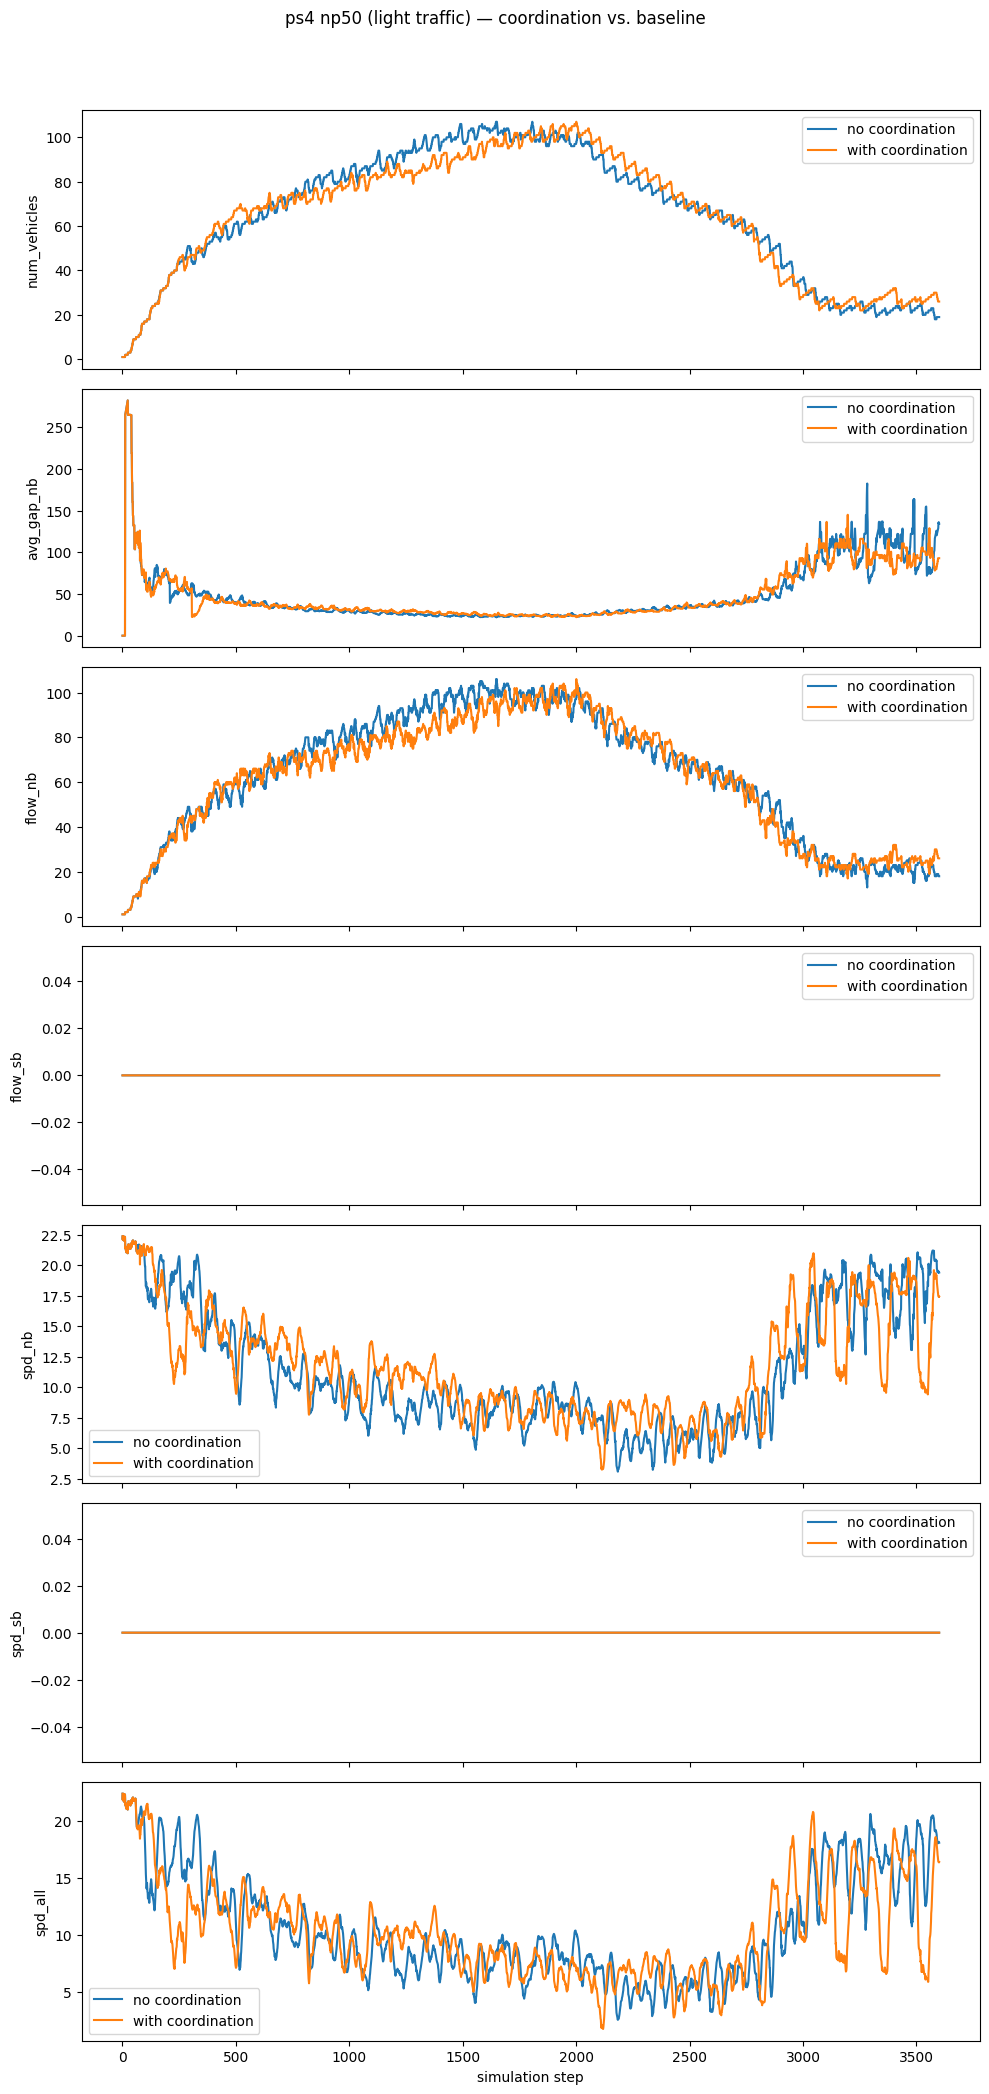

,num_vehicles,avg_gap_nb,flow_nb,flow_sb,spd_nb,spd_sb,spd_all
no coordination,65.19,49.32,63.34,0.00,11.36,0.00,10.57
with coordination,64.68,48.95,61.77,0.00,11.66,0.00,10.23


In [65]:
# Comparison: coordination vs. no‑coordination  (light traffic, ps4 np50)
# -----------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


CSV_NOCO   = "ps4_np50_traffic_light_nocoordination.csv"
CSV_COORD  = "ps4_np50_traffic_light_coordination.csv"

df_no   = pd.read_csv(CSV_NOCO)
df_co   = pd.read_csv(CSV_COORD)

metrics = [c for c in df_no.columns if c != "step"]

# ---------- plots -------------------------------------------------------
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 3*len(metrics)), sharex=True)

for ax, m in zip(axes, metrics):
    ax.plot(df_no["step"], df_no[m],  label="no coordination")
    ax.plot(df_co["step"], df_co[m],  label="with coordination")
    ax.set_ylabel(m)
    ax.legend(loc="best")
axes[-1].set_xlabel("simulation step")
fig.suptitle("ps4 np50 (light traffic) — coordination vs. baseline", y=0.995)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# ---------- averages ----------------------------------------------------
summary = pd.DataFrame({
    "no coordination":  df_no[metrics].mean(),
    "with coordination": df_co[metrics].mean()
}).T

display(summary.style.format("{:.2f}"))


In [66]:
import re, glob, pandas as pd
from pathlib import Path

# naming convention in filenames
pat = re.compile(
    r"^ps(?P<ps>\d+)_np(?P<np>\d+)_traffic_(?P<traf>light|heavy)_(?P<coord>coordination|nocoordination)\.csv$",
    flags=re.I,
)

metrics_cols = ["num_vehicles", "avg_gap_nb", "flow_nb", "spd_nb"]   # columns we want

records = []
for csv_file in glob.glob("ps*.csv"):
    m = pat.match(Path(csv_file).name)
    if not m:
        continue          # skip files that don't match pattern

    # read only needed columns to keep things light
    df = pd.read_csv(csv_file, usecols=["step"] + metrics_cols)

    # build one summary record
    record = {
        "platoon_size" : int(m["ps"]),
        "num_platoons" : int(m["np"]),
        "traffic"      : m["traf"],
        "coordination" : (m["coord"] == "coordination"),
    }
    record.update(df[metrics_cols].mean().to_dict())      # merge averages
    records.append(record)

master = pd.DataFrame(records).sort_values(
    ["platoon_size", "num_platoons", "traffic", "coordination"]
).reset_index(drop=True)

fmt_cols = master.select_dtypes("number").columns
display(master.style.format({c: "{:.2f}" for c in fmt_cols}))

# optionally save the table
master.to_csv("master_scenario_averages.csv", index=False)
print("master_scenario_averages.csv written")


,platoon_size,num_platoons,traffic,coordination,num_vehicles,avg_gap_nb,flow_nb,spd_nb
0,0.00,0.00,heavy,False,482.19,7.16,477.04,4.23
1,0.00,0.00,light,False,21.65,110.42,20.45,17.98
2,2.00,10.00,heavy,False,494.98,6.88,489.71,4.10
3,2.00,10.00,heavy,True,251.05,10.44,245.07,4.62
4,2.00,10.00,light,False,23.31,104.57,22.03,17.88
5,2.00,10.00,light,True,23.78,95.97,22.24,17.92
6,2.00,25.00,heavy,False,474.64,7.04,469.18,4.16
7,2.00,25.00,heavy,True,263.72,10.08,257.37,4.46
8,2.00,25.00,light,False,26.44,95.52,25.08,17.39
9,2.00,25.00,light,True,26.57,91.39,24.95,17.60


master_scenario_averages.csv written


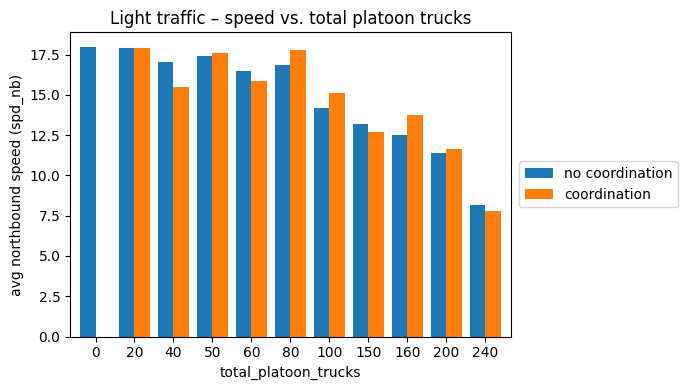

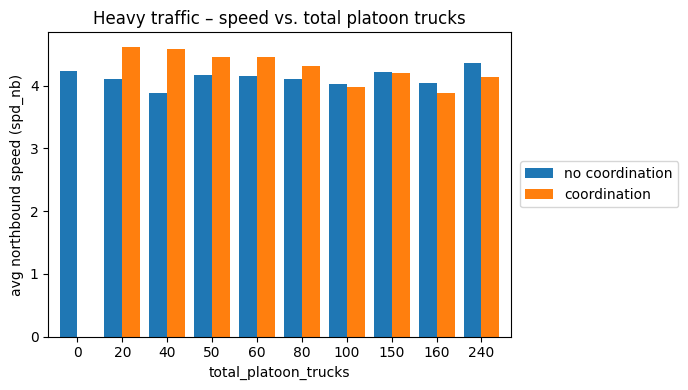

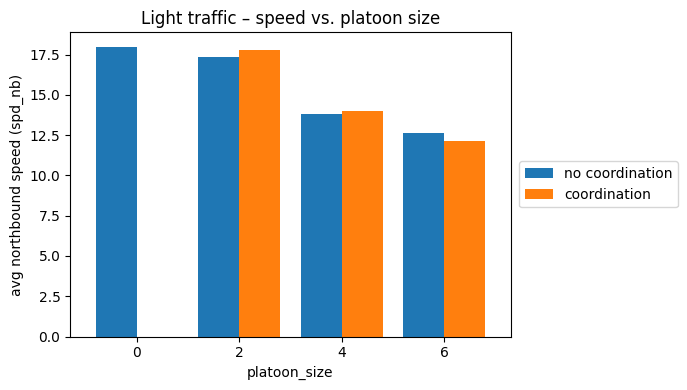

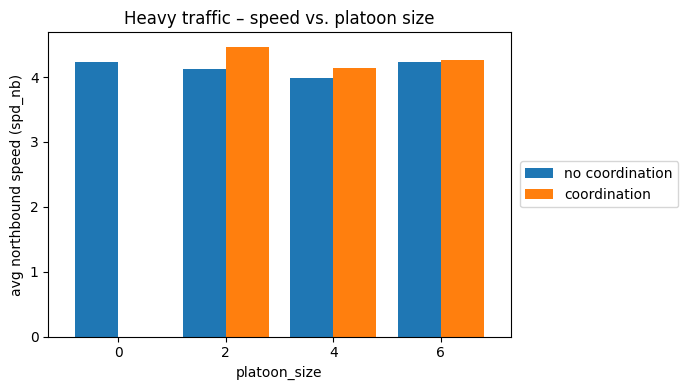

,platoon_size,num_platoons,traffic,coordination,num_vehicles,avg_gap_nb,flow_nb,spd_nb,total_platoon_trucks
0,0,0,heavy,False,482.19,7.16,477.04,4.23,0
1,0,0,light,False,21.65,110.42,20.45,17.98,0
2,2,10,heavy,False,494.98,6.88,489.71,4.10,20
3,2,10,heavy,True,251.05,10.44,245.07,4.62,20
4,2,10,light,False,23.31,104.57,22.03,17.88,20
5,2,10,light,True,23.78,95.97,22.24,17.92,20
6,2,25,heavy,False,474.64,7.04,469.18,4.16,50
7,2,25,heavy,True,263.72,10.08,257.37,4.46,50
8,2,25,light,False,26.44,95.52,25.08,17.39,50
9,2,25,light,True,26.57,91.39,24.95,17.60,50


In [67]:

# add total‑truck column 
master["total_platoon_trucks"] = master["platoon_size"] * master["num_platoons"]

# grouped‑bar helper with legend outside
def grouped_bar(df, x, title):
    """
    df : slice of master; must contain 'coordination' & 'spd_nb'
    x  : column to use on the x‑axis
    """
    pivot = (
        df.pivot_table(index=x, columns="coordination", values="spd_nb")
          .rename(columns={False: "no coordination", True: "coordination"})
          .sort_index()
    )
    ax = pivot.plot.bar(rot=0, figsize=(7, 4), width=0.8)
    ax.set_ylabel("avg northbound speed (spd_nb)")
    ax.set_title(title)
    # move legend to the right outside axes
    ax.legend(title="", bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0)
    plt.tight_layout()
    plt.show()


# speed vs **total trucks**  (light traffic)
grouped_bar(
    master[master["traffic"] == "light"],
    x="total_platoon_trucks",
    title="Light traffic – speed vs. total platoon trucks",
)

# speed vs **total trucks**  (heavy traffic)
grouped_bar(
    master[master["traffic"] == "heavy"],
    x="total_platoon_trucks",
    title="Heavy traffic – speed vs. total platoon trucks",
)

# speed vs **platoon size** (light traffic)
grouped_bar(
    master[master["traffic"] == "light"],
    x="platoon_size",
    title="Light traffic – speed vs. platoon size",
)

# speed vs **platoon size** (heavy traffic) 
grouped_bar(
    master[master["traffic"] == "heavy"],
    x="platoon_size",
    title="Heavy traffic – speed vs. platoon size",
)

display(master.round(2))


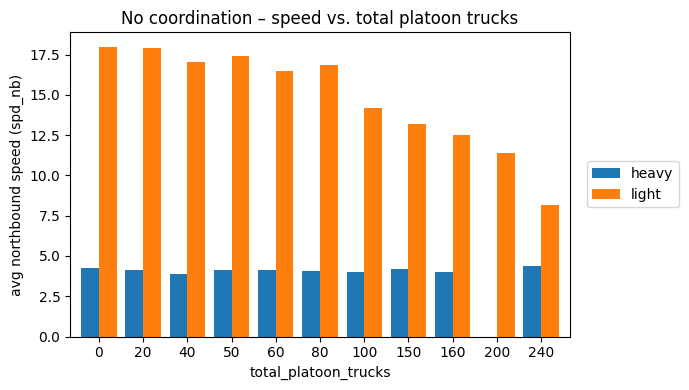

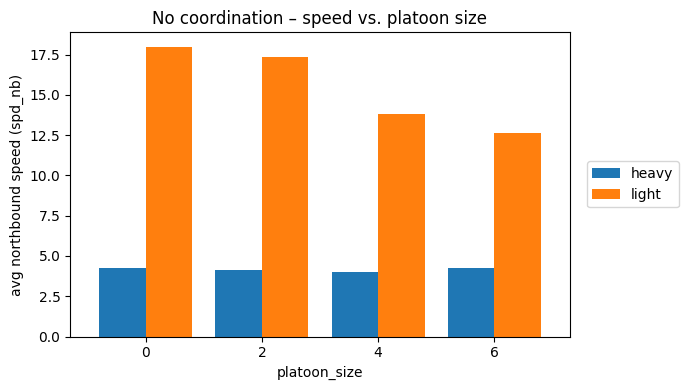

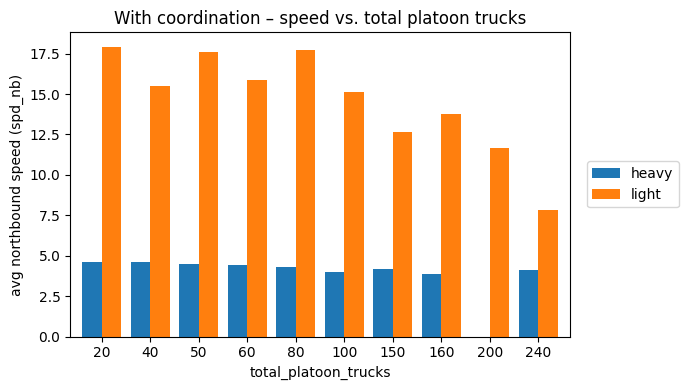

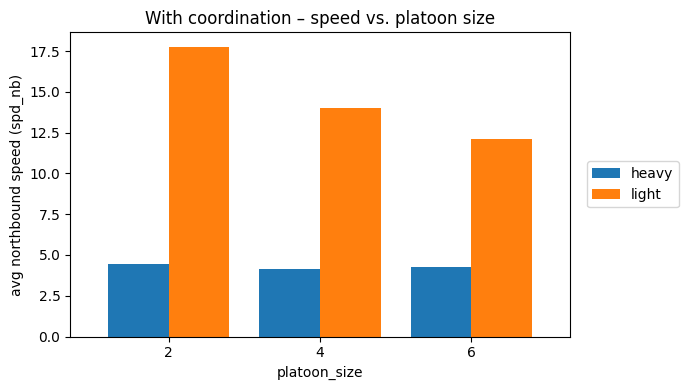

In [68]:

# add total trucks column
if "total_platoon_trucks" not in master.columns:
    master["total_platoon_trucks"] = master["platoon_size"] * master["num_platoons"]

def bar_by_traffic(df, x_col, title):
    """light vs heavy traffic bars for one x‑axis variable"""
    pivot = (
        df.pivot_table(index=x_col, columns="traffic", values="spd_nb")
          .sort_index()
    )
    ax = pivot.plot.bar(rot=0, figsize=(7, 4), width=0.8)
    ax.set_ylabel("avg northbound speed (spd_nb)")
    ax.set_title(title)
    ax.legend(title="", bbox_to_anchor=(1.02, 0.5), loc="center left")
    plt.tight_layout()
    plt.show()

# baseline (no coordination)
df_no = master[master["coordination"] == False]
bar_by_traffic(df_no, "total_platoon_trucks",
               "No coordination – speed vs. total platoon trucks")
bar_by_traffic(df_no, "platoon_size",
               "No coordination – speed vs. platoon size")

# with coordination
df_co = master[master["coordination"] == True]
bar_by_traffic(df_co, "total_platoon_trucks",
               "With coordination – speed vs. total platoon trucks")
bar_by_traffic(df_co, "platoon_size",
               "With coordination – speed vs. platoon size")


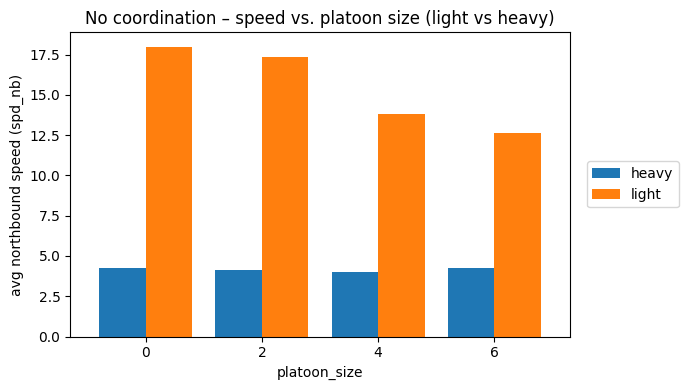

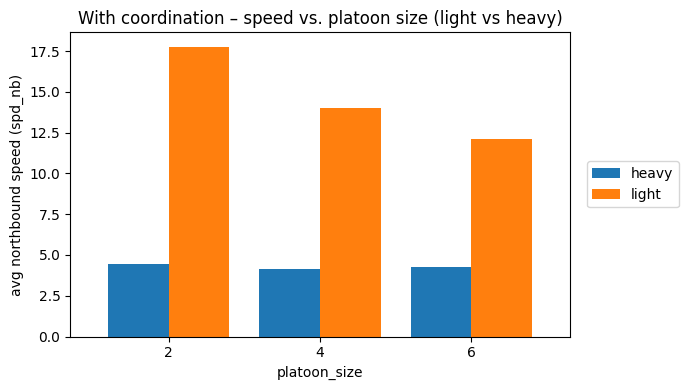

In [69]:

# make sure total_platoon_trucks exists
if "total_platoon_trucks" not in master.columns:
    master["total_platoon_trucks"] = master["platoon_size"] * master["num_platoons"]

def bar_by_ps(df, title):
    """bars by platoon size; one bar for each traffic level"""
    pivot = (
        df.pivot_table(index="platoon_size", columns="traffic", values="spd_nb")
          .sort_index()
    )
    ax = pivot.plot.bar(rot=0, figsize=(7, 4), width=0.8)
    ax.set_ylabel("avg northbound speed (spd_nb)")
    ax.set_title(title)
    ax.legend(title="", bbox_to_anchor=(1.02, 0.5), loc="center left")
    plt.tight_layout()
    plt.show()

# no coordination
bar_by_ps(
    master[master["coordination"] == False],
    "No coordination – speed vs. platoon size (light vs heavy)",
)

# with coordination
bar_by_ps(
    master[master["coordination"] == True],
    "With coordination – speed vs. platoon size (light vs heavy)",
)


In [70]:
# add a categorical column that labels each row by total platoon trucks
master["truck_group"] = master["total_platoon_trucks"].apply(
    lambda n: "<125" if n < 125 else ">=125"
)
master.head()

,platoon_size,num_platoons,traffic,coordination,num_vehicles,avg_gap_nb,flow_nb,spd_nb,total_platoon_trucks,truck_group
0,0,0,heavy,False,482.188611,7.156396,477.041111,4.229669,0,<125
1,0,0,light,False,21.652500,110.415458,20.453333,17.977901,0,<125
2,2,10,heavy,False,494.975278,6.882232,489.705833,4.101861,20,<125
3,2,10,heavy,True,251.047500,10.437467,245.065556,4.617669,20,<125
4,2,10,light,False,23.306944,104.571930,22.028333,17.884282,20,<125


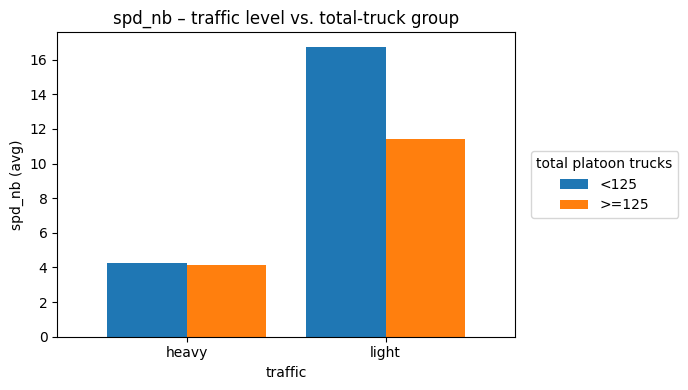

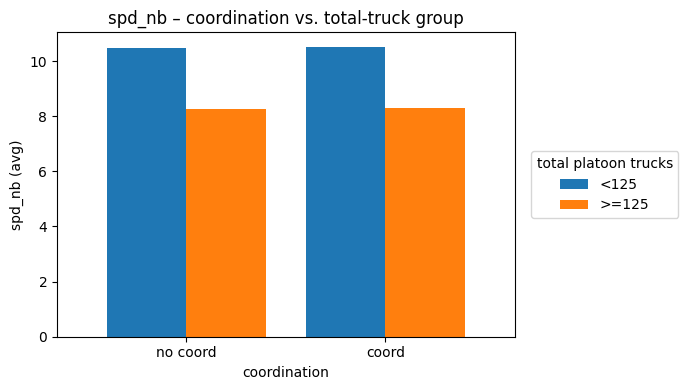

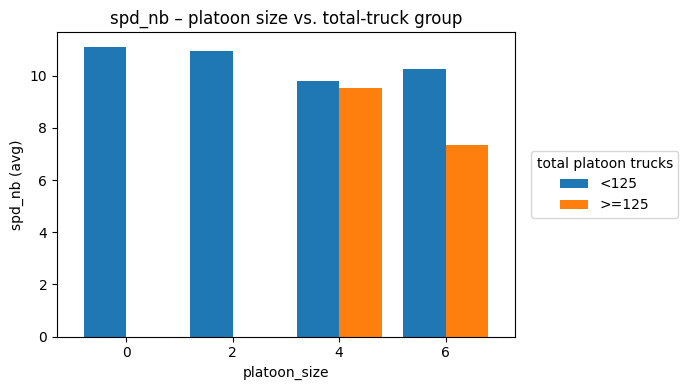

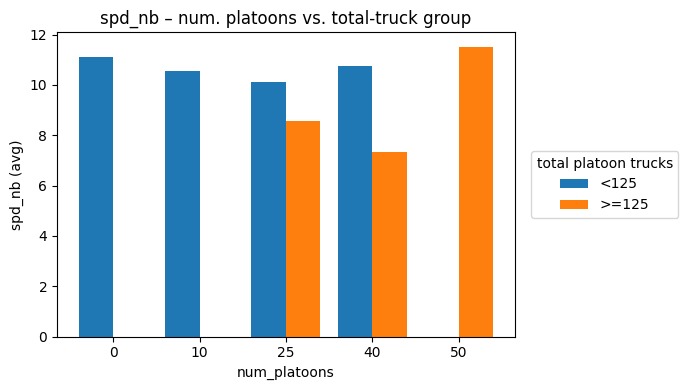

In [71]:

# choose the speed column present in your master table
metric = "avg_spd_nb" if "avg_spd_nb" in master.columns else "spd_nb"

# guarantee the grouping column exists
if "truck_group" not in master.columns:
    master["truck_group"] = master["total_platoon_trucks"].apply(
        lambda n: "<125" if n < 125 else "≥125"
    )

def grouped_bar(df, x_col, title):
    """Make a grouped bar chart where bars = truck_group, x‑axis = x_col."""
    pivot = (
        df.pivot_table(index=x_col, columns="truck_group", values=metric)
          .sort_index()
          .sort_index(axis=1)   # ensure '<125' left of '≥125'
    )

    # nicer x‑tick labels for coordination boolean
    if x_col == "coordination":
        pivot.index = pivot.index.map({False: "no coord", True: "coord"})

    ax = pivot.plot.bar(rot=0, figsize=(7, 4), width=0.8)
    ax.set_ylabel(f"{metric} (avg)")
    ax.set_title(title)
    ax.legend(title="total platoon trucks",
              bbox_to_anchor=(1.02, 0.5), loc="center left")
    plt.tight_layout()
    plt.show()


# compare by traffic level
grouped_bar(master, "traffic",
            f"{metric} – traffic level vs. total‑truck group")

# compare by coordination state
grouped_bar(master, "coordination",
            f"{metric} – coordination vs. total‑truck group")

# compare by platoon size
grouped_bar(master, "platoon_size",
            f"{metric} – platoon size vs. total‑truck group")

# compare by number of platoons
grouped_bar(master, "num_platoons",
            f"{metric} – num. platoons vs. total‑truck group")


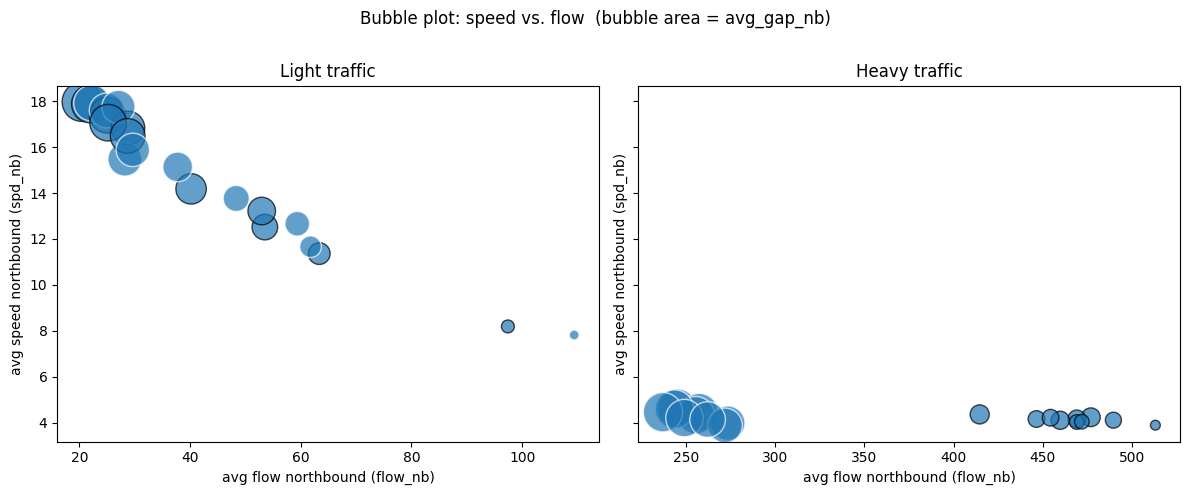

In [72]:
# Bubble scatter: flow_nb vs. spd_nb
# bubble area = avg_gap_nb
# separate panels for light and heavy traffic
# marker edge indicates coordination state

import matplotlib.pyplot as plt
import numpy as np

# normalise bubble sizes for visibility
def size_scale(series, min_size=50, max_size=800):
    s_min, s_max = series.min(), series.max()
    # avoid division by zero
    if s_min == s_max:
        return np.full_like(series, (min_size + max_size) / 2)
    return min_size + (series - s_min) / (s_max - s_min) * (max_size - min_size)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, traffic in zip(axes, ["light", "heavy"]):
    sub = master[master["traffic"] == traffic]

    # bubble sizes
    sizes = size_scale(sub["avg_gap_nb"])

    # edgecolor = coordination state
    edge_colors = sub["coordination"].map({False: "black", True: "white"})

    sc = ax.scatter(
        sub["flow_nb"],
        sub["spd_nb"],
        s=sizes,
        edgecolors=edge_colors,
        alpha=0.7,
    )

    ax.set_title(f"{traffic.capitalize()} traffic")
    ax.set_xlabel("avg flow northbound (flow_nb)")
    ax.set_ylabel("avg speed northbound (spd_nb)")

# overall figure adjustments
fig.suptitle("Bubble plot: speed vs. flow  (bubble area = avg_gap_nb)")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


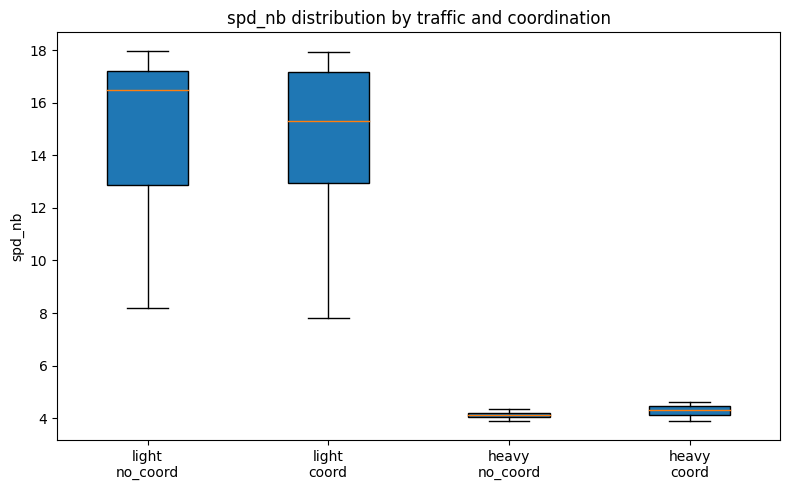

In [73]:
# Box plots of spd_nb
# x axis = traffic (light, heavy)
# two boxes per traffic value: no coordination, coordination

import matplotlib.pyplot as plt
import pandas as pd

# make readable labels
master["coord_label"] = master["coordination"].map({False: "no_coord", True: "coord"})

fig, ax = plt.subplots(figsize=(8, 5))

# build a list of data and labels for boxplot
data = []
labels = []
for traffic in ["light", "heavy"]:
    for coord in ["no_coord", "coord"]:
        subset = master[
            (master["traffic"] == traffic) &
            (master["coord_label"] == coord)
            ]
        data.append(subset["spd_nb"])
        labels.append(f"{traffic}\n{coord}")

ax.boxplot(data, labels=labels, patch_artist=True)
ax.set_ylabel("spd_nb")
ax.set_title("spd_nb distribution by traffic and coordination")
plt.tight_layout()
plt.show()


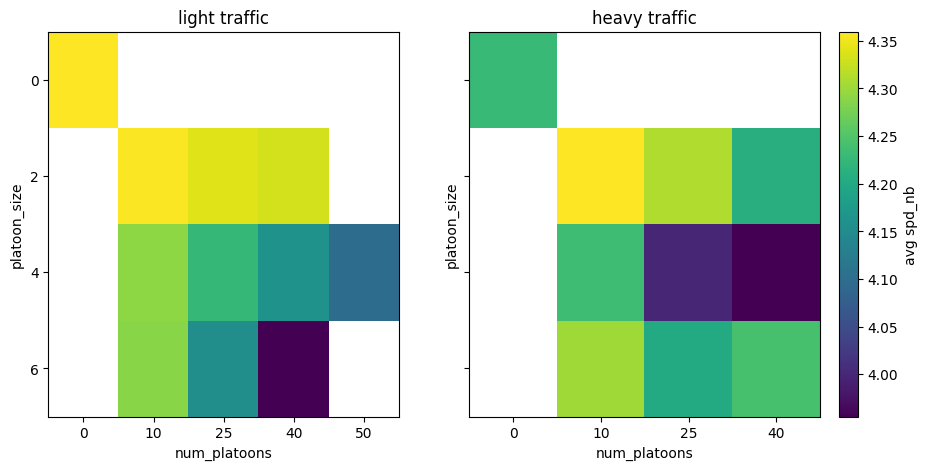

In [74]:
# Heat‑map of spd_nb
# rows = platoon_size, columns = num_platoons
# separate panels for light and heavy traffic
# color‑bar (legend) placed outside the plots

import matplotlib.pyplot as plt
import numpy as np

traffic_levels = ["light", "heavy"]
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, traffic in zip(axes, traffic_levels):
    # pivot to platoon_size × num_platoons
    pivot = (
        master[master["traffic"] == traffic]
        .pivot_table(
            index="platoon_size",
            columns="num_platoons",
            values="spd_nb",
            aggfunc="mean",
        )
        .sort_index()
        .sort_index(axis=1)
    )

    im = ax.imshow(pivot.values, cmap="viridis", aspect="auto")
    ax.set_title(f"{traffic} traffic")
    ax.set_xlabel("num_platoons")
    ax.set_ylabel("platoon_size")
    ax.set_xticks(range(len(pivot.columns)))
    ax.set_xticklabels(pivot.columns)
    ax.set_yticks(range(len(pivot.index)))
    ax.set_yticklabels(pivot.index)

# put a single color‑bar to the right of both heat maps
cbar = fig.colorbar(
    im,
    ax=axes.ravel().tolist(),
    location="right",
    pad=0.02,
)
cbar.set_label("avg spd_nb")

# plt.tight_layout()
plt.show()


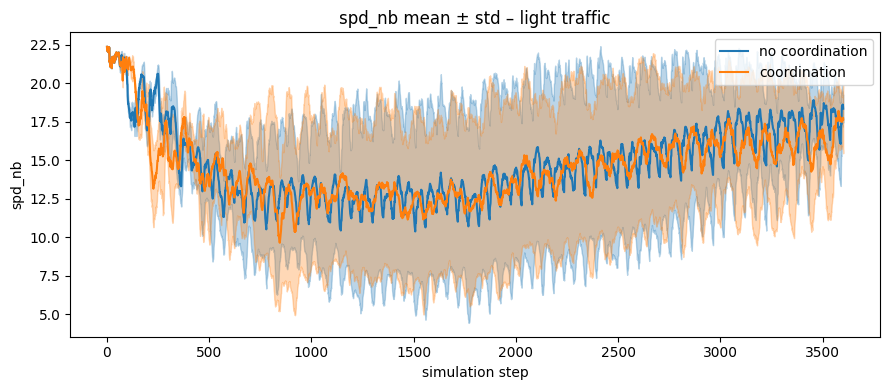

In [76]:
# Time‑series ribbon: mean ± std of spd_nb
# compares coordination vs no‑coord for chosen traffic level

import glob
import pandas as pd
import matplotlib.pyplot as plt

traffic = "light"  # choose "light" or "heavy"

# collect CSVs
files_no = glob.glob(f"ps*_traffic_{traffic}_nocoordination.csv")
files_co = glob.glob(f"ps*_traffic_{traffic}_coordination.csv")


def mean_std(file_list):
    """return mean and std of spd_nb at each step"""
    dfs = [pd.read_csv(f, usecols=["step", "spd_nb"]) for f in file_list]
    merged = pd.concat(dfs)
    grp = merged.groupby("step")["spd_nb"]
    return grp.mean(), grp.std()


mean_no, std_no = mean_std(files_no)
mean_co, std_co = mean_std(files_co)

plt.figure(figsize=(9, 4))

# no coordination ribbon
plt.plot(mean_no.index, mean_no, label="no coordination", color="tab:blue")
plt.fill_between(mean_no.index, mean_no - std_no, mean_no + std_no,
                 alpha=0.3, color="tab:blue")

# coordination ribbon
plt.plot(mean_co.index, mean_co, label="coordination", color="tab:orange")
plt.fill_between(mean_co.index, mean_co - std_co, mean_co + std_co,
                 alpha=0.3, color="tab:orange")

plt.xlabel("simulation step")
plt.ylabel("spd_nb")
plt.title(f"spd_nb mean ± std – {traffic} traffic")
plt.legend()
plt.tight_layout()
plt.show()


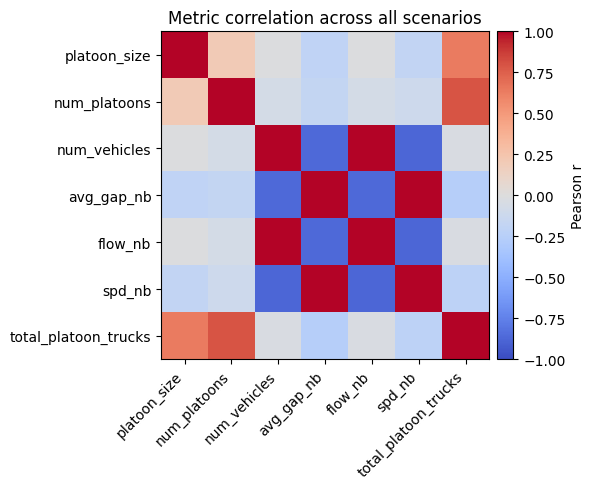

In [78]:
# Correlation heat map for numeric columns in master

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# pick only numeric columns
num_cols = master.select_dtypes("number")

corr = num_cols.corr()

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr.values, cmap="coolwarm", vmin=-1, vmax=1)

# tick labels
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticks(range(len(corr.index)))
ax.set_yticklabels(corr.index)

# color bar outside
cbar = fig.colorbar(im, ax=ax, location="right", pad=0.02)
cbar.set_label("Pearson r")

ax.set_title("Metric correlation across all scenarios")
plt.tight_layout()
plt.show()


In [79]:
corr

,platoon_size,num_platoons,num_vehicles,avg_gap_nb,flow_nb,spd_nb,total_platoon_trucks
platoon_size,1.000000,0.200144,-0.013608,-0.197768,-0.014787,-0.182645,0.635177
num_platoons,0.200144,1.000000,-0.066631,-0.174792,-0.067535,-0.110056,0.793399
num_vehicles,-0.013608,-0.066631,1.000000,-0.866494,0.999977,-0.878285,-0.032286
avg_gap_nb,-0.197768,-0.174792,-0.866494,1.000000,-0.863839,0.992894,-0.259348
flow_nb,-0.014787,-0.067535,0.999977,-0.863839,1.000000,-0.875607,-0.033388
spd_nb,-0.182645,-0.110056,-0.878285,0.992894,-0.875607,1.000000,-0.212510
total_platoon_trucks,0.635177,0.793399,-0.032286,-0.259348,-0.033388,-0.212510,1.000000
